In [1]:
# import basic dependencies 
import pandas as pd
import numpy as np
import os
import shutil
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import random

In [2]:
tqdm.pandas()

In [3]:
labels_df = pd.read_csv("data/labels.csv")
labels_df["path"] = "data/images/" + labels_df["image"] + ".jpeg"
labels_df["exist"] = labels_df["path"].progress_apply(os.path.exists)
labels_df["level"] = labels_df["level"].progress_apply(lambda x: x if x == 0 else 1)
labels_df = labels_df[labels_df["exist"] == True]
labels_df = labels_df[["image", "path", "level"]]
labels_df.head(10)

100%|███████████████████████████████████████████████████████████████████████| 35126/35126 [00:00<00:00, 1097742.53it/s]


,image,path,level
0,10_left,data/images/10_left.jpeg,0
1,10_right,data/images/10_right.jpeg,0
2,13_left,data/images/13_left.jpeg,0
3,13_right,data/images/13_right.jpeg,0
4,15_left,data/images/15_left.jpeg,1
5,15_right,data/images/15_right.jpeg,1
6,16_left,data/images/16_left.jpeg,1
7,16_right,data/images/16_right.jpeg,1
8,17_left,data/images/17_left.jpeg,0
9,17_right,data/images/17_right.jpeg,1


In [4]:
labels_df["level"].value_counts()

0    25810
1     9316
Name: level, dtype: int64

In [5]:
labels_df["level"].value_counts(normalize=True)

0    0.734783
1    0.265217
Name: level, dtype: float64

In [6]:
grouped = labels_df.groupby("level")
sampled_df = grouped.apply(lambda x: x.sample(frac=0.2, replace=True, random_state=0) if len(x) > 10 else x)
sampled_df = pd.DataFrame(sampled_df).reset_index(drop=True)
sampled_df["level"].value_counts()

0    5162
1    1863
Name: level, dtype: int64

In [7]:
sampled_df["level"].value_counts(normalize=True)

0    0.734804
1    0.265196
Name: level, dtype: float64

In [8]:
sampled_df.head(10)

,image,path,level
0,4593_right,data/images/4593_right.jpeg,0
1,18542_right,data/images/18542_right.jpeg,0
2,16973_right,data/images/16973_right.jpeg,0
3,33928_right,data/images/33928_right.jpeg,0
4,22678_right,data/images/22678_right.jpeg,0
5,36713_right,data/images/36713_right.jpeg,0
6,15874_left,data/images/15874_left.jpeg,0
7,41791_left,data/images/41791_left.jpeg,0
8,35840_right,data/images/35840_right.jpeg,0
9,38423_right,data/images/38423_right.jpeg,0


In [9]:
# Calculate the desired number of samples for each level
level_counts = sampled_df["level"].value_counts()
desired_samples = int(level_counts.min() * 0.3) # 20% of the minimum level count

# Initialize an empty list to store the selected samples
selected_samples = []

# Select the desired number of samples for each level
for level in level_counts.index:
    level_df = sampled_df[sampled_df["level"] == level]
    selected_samples.append(level_df.sample(desired_samples, random_state=0))

# Concatenate the selected samples to create the test dataframe
test_df = pd.concat(selected_samples)

# Create the train dataframe by excluding the test samples
train_df = sampled_df[~sampled_df.index.isin(test_df.index)]

In [10]:
train_df["level"].value_counts()

0    4604
1    1305
Name: level, dtype: int64

In [11]:
test_df["level"].value_counts()

0    558
1    558
Name: level, dtype: int64

In [12]:
train_df.shape[0], test_df.shape[0]

(5909, 1116)

In [13]:
dr_dict = {0: "no_dr", 1: "with_dr"}

In [14]:
# Iterate over the rows of the dataframe
test_new_path = list()
for index, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    level = row["level"]
    file_path = row["path"]
    
    # Create a folder for the level if it doesn't exist
    level_folder = "data\\preprocessed\\test\\" + str(dr_dict[level])
    if not os.path.exists(level_folder):
        os.makedirs(level_folder)
    
    # Save the file to the level folder
    destination_path = os.path.join(level_folder, os.path.basename(file_path))
    shutil.copy(file_path, destination_path)
    
    # Open the image
    image = Image.open(destination_path)
    
    # Crop the image to hxh, centered on the middle of the image
    w, h = image.size
    left = (w - h) / 2
    top = 0
    right = (w + h) / 2
    bottom = h
    image = image.crop((left, top, right, bottom))
    
    # Resize the image from hxh to 512x512
    new_dim = 512
    image = image.resize((new_dim, new_dim))
    
    # Save the cropped image back to the destination path
    image.save(destination_path)
    test_new_path.append(destination_path)

100%|██████████████████████████████████████████████████████████████████████████████| 1116/1116 [00:18<00:00, 60.70it/s]


In [15]:
# Iterate over the rows of the dataframe
train_new_path = list()
for index, row in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    level = row["level"]
    file_path = row["path"]
    
    # Create a folder for the level if it doesn't exist
    level_folder = "data\\preprocessed\\train\\" + str(dr_dict[level])
    if not os.path.exists(level_folder):
        os.makedirs(level_folder)
    
    # Save the file to the level folder
    destination_path = os.path.join(level_folder, os.path.basename(file_path))
    shutil.copy(file_path, destination_path)
    
    # Open the image
    image = Image.open(destination_path)
    
    # Crop the image to hxh, centered on the middle of the image
    w, h = image.size
    left = (w - h) / 2
    top = 0
    right = (w + h) / 2
    bottom = h
    image = image.crop((left, top, right, bottom))
    
    # Resize the image from hxh to 512x512
    new_dim = 512
    image = image.resize((new_dim, new_dim))
    
    # Save the cropped image back to the destination path
    image.save(destination_path)
    train_new_path.append(destination_path)

100%|██████████████████████████████████████████████████████████████████████████████| 5909/5909 [01:35<00:00, 61.65it/s]


In [16]:
test_df["updated_path"] = test_new_path
train_df["updated_path"] = train_new_path
test_df.to_csv("data/preprocessed/test_labels.csv", index=False)
train_df.to_csv("data/preprocessed/train_labels.csv", index=False)

<ipython-input-16-e784b246b86c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["updated_path"] = train_new_path


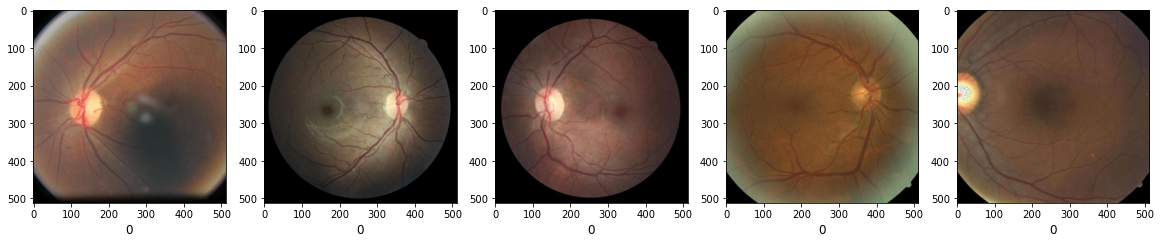

In [17]:
# Select 5 random indices from test_df
indices = random.sample(range(test_df.shape[0]), 5)

# Plot the 5 random images
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, index in enumerate(indices):
    row = train_df.iloc[index]
    file_path = row["updated_path"]
    image = plt.imread(file_path)
    ax[i].set_xlabel(row["level"], fontsize="large")
    ax[i].imshow(image)

plt.show()

In [18]:
4604 - train_df["level"].value_counts()

0       0
1    3299
Name: level, dtype: int64